# Module: Introduction

In [4]:
# Required Python module
import pandas as pd

In [5]:
# Importing the data with pandas and using its 'year' column for the index
# Make sure that LYNXdata.csv is at the same location as this python notebook
mylynx_df = pd.read_csv(
    "LYNXdata.csv", header=0, names=["year", "trappings"], index_col=0
)

In [6]:
# Read in the 'nottem' dataset
# Make sure that nottem.csv is at the same location as this python notebook
nottem_df = pd.read_csv("nottem.csv", header=0, names=["index", "temp"], index_col=0)

In [7]:
mylynx_df.head()

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475


In [8]:
nottem_df.head()

,temp
index,
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1


In [9]:
# Converting the DataFrame into a Series object
# New index generation with a proper date index and frequency
mylynxts = pd.Series(
    mylynx_df["trappings"].values,
    index=pd.date_range("31/12/1821", periods=114, freq="A-DEC"),
)

In [10]:
# Converting the DataFrame into a Series object
# Proper time stamp with monthly frequency
nottemts = pd.Series(
    nottem_df["temp"].values, index=pd.date_range("1920-01-31", periods=240, freq="M")
)

In [11]:
mylynxts.head()

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

In [12]:
nottemts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

# Module: The Statistics of Time Series

In [13]:
# Required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Importing the data with pandas and using its 'year' column for the index
# Make sure that LYNXdata.csv is in the same folder as this python notebook
mylynx_df = pd.read_csv(
    "LYNXdata.csv", header=0, names=["year", "trappings"], index_col=0
)

In [15]:
# Converting the DataFrame into a Series object
# New index generation with a proper date index and frequency
mylynxts = pd.Series(
    mylynx_df["trappings"].values,
    index=pd.date_range("31/12/1821", periods=114, freq="A-DEC"),
)

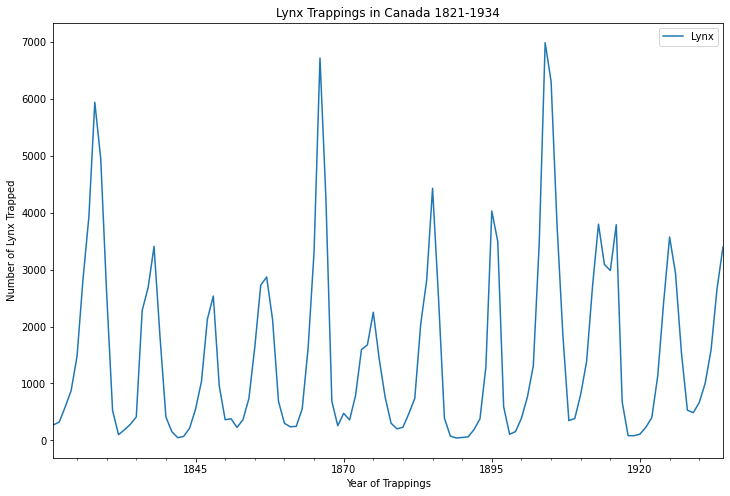

In [16]:
# Visualizing time series in Python
# 1. Line graph with matplotlib pyplot module
plt.figure(figsize=(12, 8))
mylynxts.plot()
plt.title("Lynx Trappings in Canada 1821-1934")
plt.xlabel("Year of Trappings")
plt.ylabel("Number of Lynx Trapped")
plt.legend(["Lynx"])

In [17]:
# 2. Shared axis plot
# Getting the cumulative total of mylynxts
# The new object inherits the original index
cumsum_lynx = np.cumsum(mylynxts)

In [18]:
cumsum_lynx.head()

1821-12-31     269
1822-12-31     590
1823-12-31    1175
1824-12-31    2046
1825-12-31    3521
Freq: A-DEC, dtype: int64

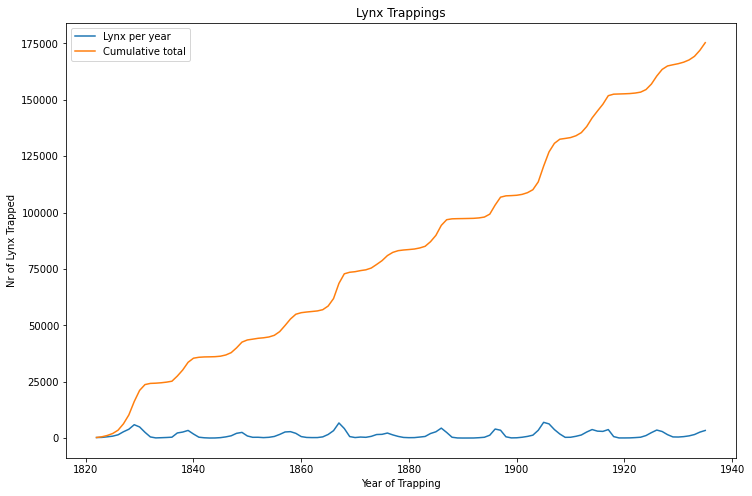

In [19]:
# Plotting two series on the same axes
plt.figure(figsize=(12, 8))
plt.plot(mylynxts)
plt.plot(cumsum_lynx)
plt.title("Lynx Trappings")
plt.xlabel("Year of Trapping")
plt.ylabel("Nr of Lynx Trapped")
plt.legend(["Lynx per year", "Cumulative total"])

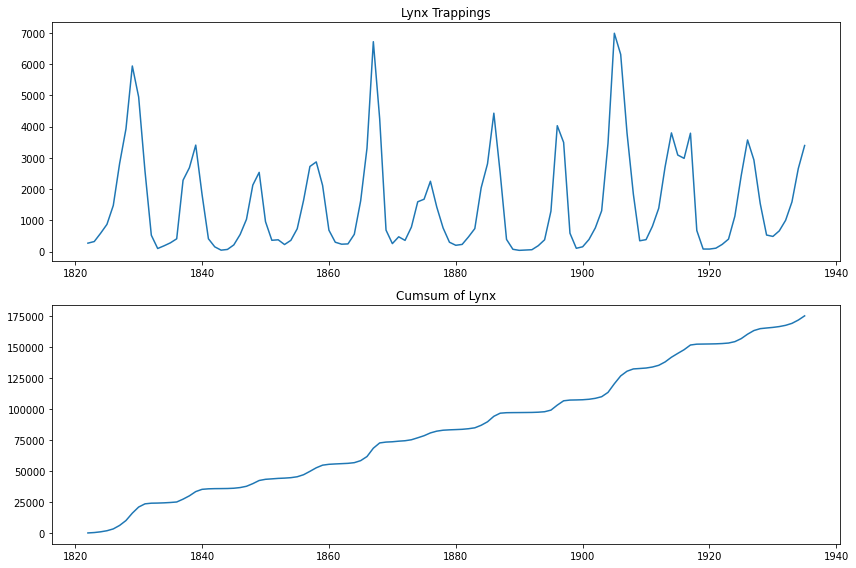

In [20]:
# 3. Two plots in the same figure with subplots
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(mylynxts)
plt.title("Lynx Trappings")

plt.subplot(2, 1, 2)
plt.plot(cumsum_lynx)
plt.title("Cumsum of Lynx")
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

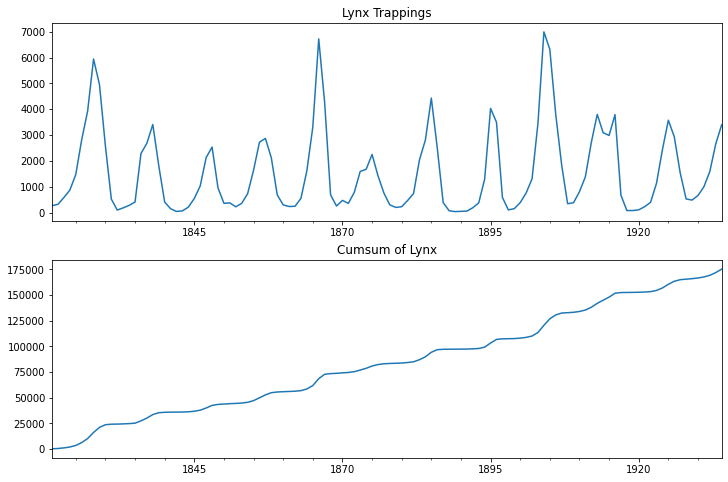

In [21]:
# Alternative method with classes
# Integrating plotting tools in the matplotlib environment
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
mylynxts.plot(ax=ax1)
cumsum_lynx.plot(ax=ax2)
ax1.set_title("Lynx Trappings")
ax2.set_title("Cumsum of Lynx")
plt.tight_layout

In [22]:
# Test for stationarity
def stationarity_test(timeseries):
    """ "Augmented Dickey-Fuller test
    A test for stationarity"""
    from statsmodels.tsa.stattools import adfuller

    print("Results of Dickey-Fuller Test:")
    df_test = adfuller(timeseries, autolag="AIC")
    df_output = pd.Series(
        df_test[0:4],
        index=[
            "Test statistic",
            "p-value",
            "Number of lags used",
            "Number of observations used",
        ],
    )
    print(df_output)

<AxesSubplot:>

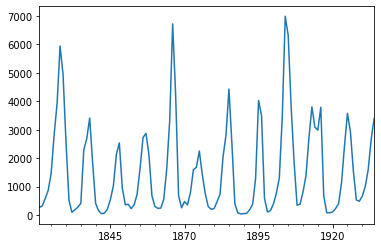

In [23]:
mylynxts.plot()

In [24]:
# Applying the test on three different datasets
# 1. The lynx dataset
stationarity_test(mylynxts)

Results of Dickey-Fuller Test:
Test statistic                  -2.996304
p-value                          0.035241
Number of lags used              7.000000
Number of observations used    106.000000
dtype: float64


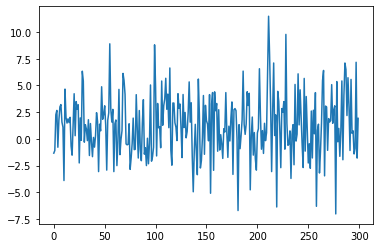

In [25]:
# 2. Random normally distributed numbers
# Note the characteristics of stationary data on the plot
plt.plot(np.random.normal(1, 3, 300))

In [26]:
stationarity_test(np.random.normal(1, 3, 300))

Results of Dickey-Fuller Test:
Test statistic                -1.735805e+01
p-value                        5.223673e-30
Number of lags used            0.000000e+00
Number of observations used    2.990000e+02
dtype: float64


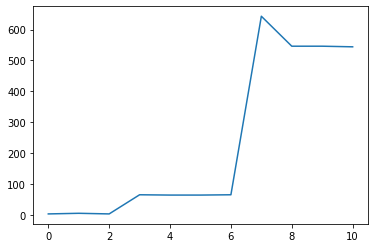

In [27]:
# 3. A vector of numbers
# Note the three levels in the data
mydata = (3, 5, 3, 65, 64, 64, 65, 643, 546, 546, 544)
plt.plot(mydata)

In [28]:
stationarity_test(mydata)

Results of Dickey-Fuller Test:
Test statistic                 42.200457
p-value                         1.000000
Number of lags used             3.000000
Number of observations used     7.000000
dtype: float64


In [29]:
# Importing ACF and PACF plot functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

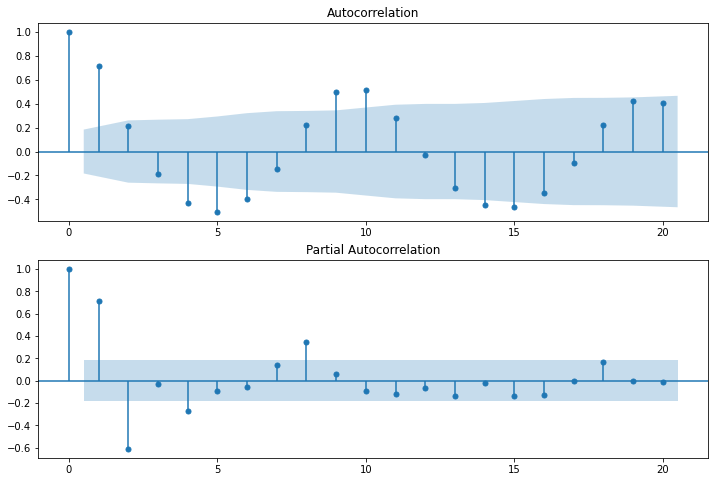

In [30]:
# Autocorrelation and partial autocorrelation in the Lynx dataset
# Two plots on one sheet
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(mylynxts, lags=20, ax=ax1)
plot_pacf(mylynxts, lags=20, ax=ax2);

In [31]:
# Simple moving average (rolling mean)
# Note: the rolling methods are applicable only on pandas Series
#                                            and DataFrame objects
def plot_rolling(timeseries, window):
    rol_mean = timeseries.rolling(window).mean()
    rol_std = timeseries.rolling(window).std()

    fig = plt.figure(figsize=(12, 8))
    og = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(rol_mean, color="red", label="Rolling Mean")
    std = plt.plot(rol_std, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean and Standard Deviation (window = " + str(window) + ")")
    plt.show()

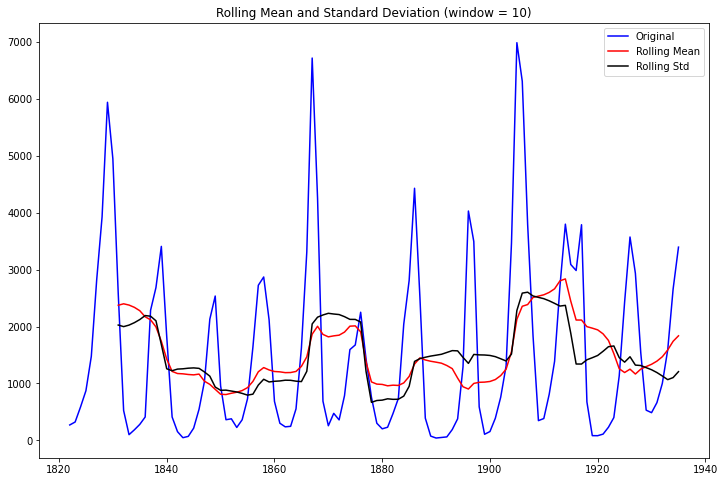

In [32]:
plot_rolling(mylynxts, 10)

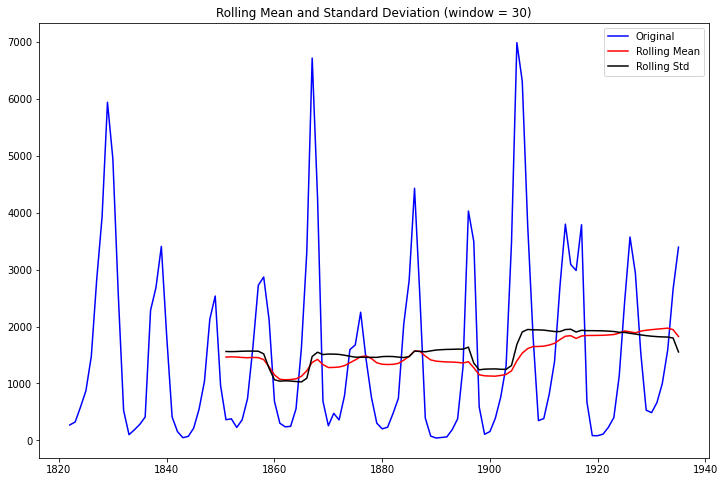

In [33]:
plot_rolling(mylynxts, 30)

In [34]:
# Components are accessible via the dot notation
# Getting the smooth values only
mylynxts.rolling(10).mean()

1821-12-31       NaN
1822-12-31       NaN
1823-12-31       NaN
1824-12-31       NaN
1825-12-31       NaN
               ...  
1930-12-31    1391.4
1931-12-31    1468.5
1932-12-31    1587.6
1933-12-31    1740.1
1934-12-31    1836.5
Freq: A-DEC, Length: 114, dtype: float64

In [35]:
# Simple rolling calculation with minimum number of periods for the window
def plot_rolling_min(timeseries, window):
    rol_mean = timeseries.rolling(window, min_periods=1).mean()
    rol_std = timeseries.rolling(window, min_periods=1).std()

    fig = plt.figure(figsize=(12, 8))
    og = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(rol_mean, color="red", label="Rolling Mean")
    std = plt.plot(rol_std, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean and Standard Deviation (window = " + str(window) + ")")
    plt.show()

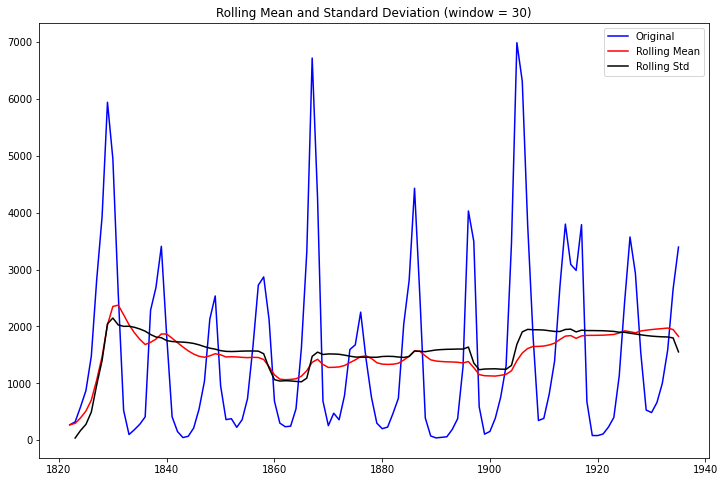

In [36]:
# No NaN values, but shorter window size if <30
plot_rolling_min(mylynxts, 30)

In [37]:
# Exponentially weighted moving average
# Note: the ewm method is applicable on pandas Series and DataFrame objects only
def plot_ewma(timeseries, alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()

    fig = plt.figure(figsize=(12, 8))
    og_line = plt.plot(timeseries, color="blue", label="Original")
    exwm_line = plt.plot(expw_ma, color="red", label="EWMA")
    plt.legend(loc="best")
    plt.title("EWMA (alpha= " + str(alpha) + ")")
    plt.show()

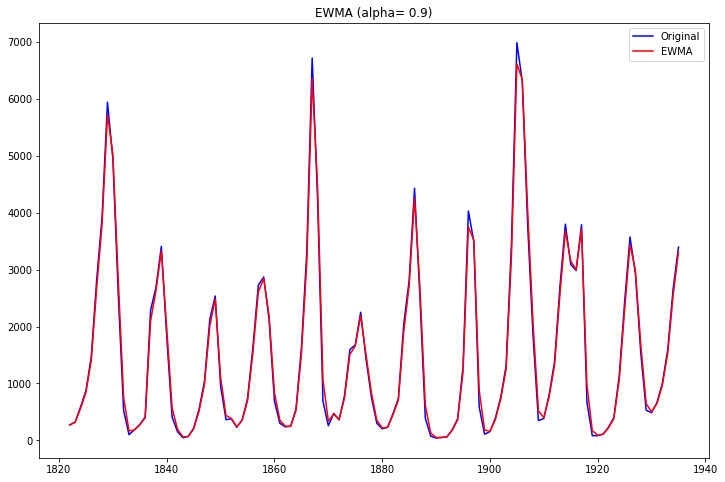

In [38]:
plot_ewma(mylynxts, 0.9)

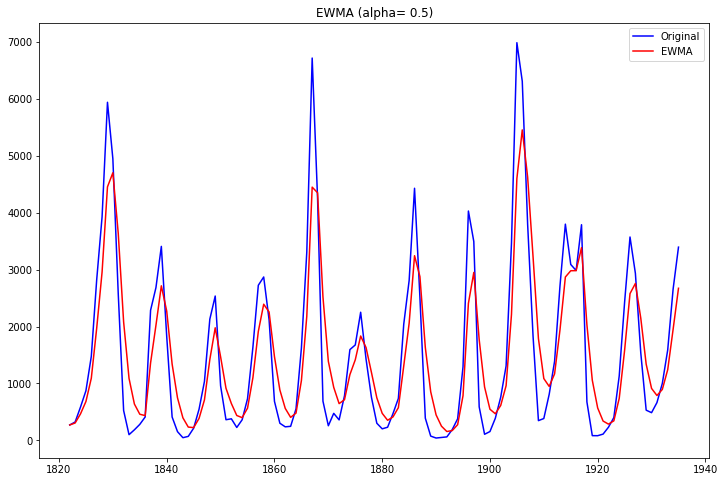

In [39]:
plot_ewma(mylynxts, 0.5)

# Module: Creating a Time Series Forecast Using ARIMA Regressions

In [40]:
# Required packages
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt

In [41]:
# Importing the Lynx dataset
# Make sure that LYNXdata.csv is in the same folder as this python notebook
mylynx_df = pd.read_csv("LYNXdata.csv", header=0, index_col=0)

In [42]:
mylynx_df.head()

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475


In [43]:
# Converting the DataFrame into a Series object
# ARIMA modeling requires a tuple index
mylynxts = pd.Series(
    mylynx_df["trappings"].values,
    index=pd.DatetimeIndex(
        data=(tuple(pd.date_range("31/12/1821", periods=114, freq="A-DEC"))),
        freq="A-DEC",
    ),
)

In [44]:
mylynxts.head()

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

In [45]:
# Getting the ARIMA modeling function
from statsmodels.tsa.arima_model import ARIMA

In [46]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  .. deprecated:: 0.12
 |     Use statsmodels.tsa.arima.model.ARIMA instead
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M',

In [47]:
# ACF and PACF functions to test for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [48]:
# Custom stationarity test function
def stationarity_test(timeseries):
    """ "Augmented Dickey-Fuller Test
    Test for Stationarity"""
    import pandas as pd
    from statsmodels.tsa.stattools import adfuller

    print("Results of Dickey-Fuller Test:")
    df_test = adfuller(timeseries, autolag="AIC")
    df_output = pd.Series(
        df_test[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "Number of Lags Used",
            "Number of Observations Used",
        ],
    )
    print(df_output)

In [49]:
stationarity_test(mylynxts)

Results of Dickey-Fuller Test:
Test Statistic                  -2.996304
p-value                          0.035241
Number of Lags Used              7.000000
Number of Observations Used    106.000000
dtype: float64


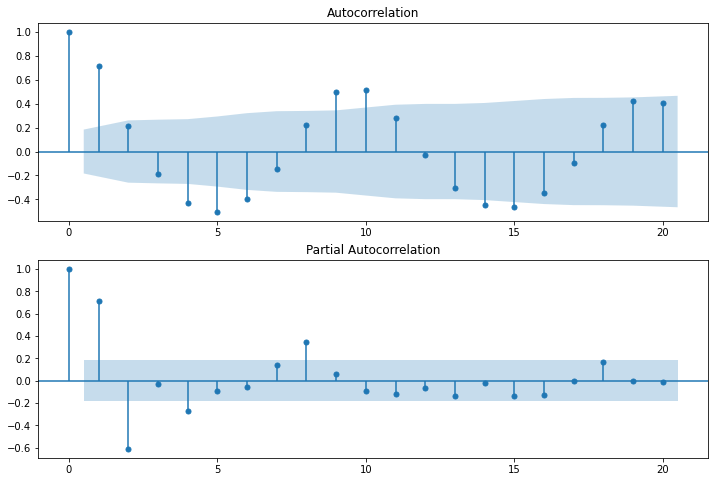

In [50]:
# ACF and PACF plots
# Rule of thumb: Start with the plot that shows the least number of significant lags
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(mylynxts, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(mylynxts, lags=20, ax=ax2)

C:\Users\hetia\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


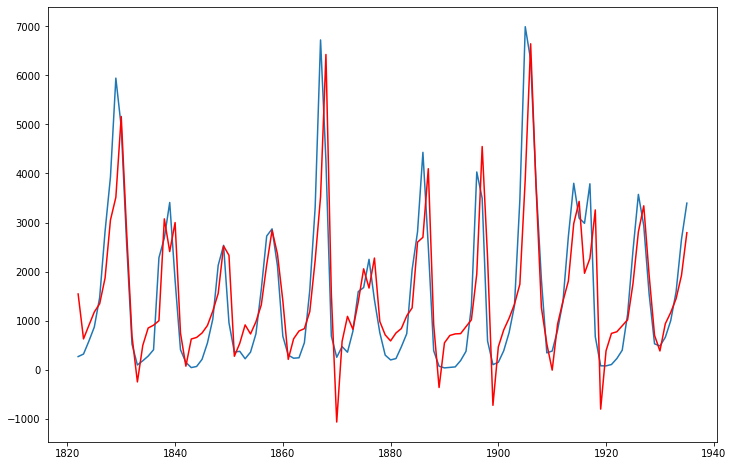

In [51]:
# ARIMA model setup
model = ARIMA(mylynxts, order=(2, 0, 0))
results_AR2 = model.fit()
plt.figure(figsize=(12, 8))
plt.plot(mylynxts)
plt.plot(results_AR2.fittedvalues, color="red")

In [52]:
# Model residuals
mylynxts.tail()

1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, dtype: int64

In [53]:
results_AR2.fittedvalues.tail()

1930-12-31     938.017679
1931-12-31    1167.503652
1932-12-31    1449.182020
1933-12-31    1923.454984
1934-12-31    2793.918972
Freq: A-DEC, dtype: float64

In [54]:
results_AR2.resid.tail()

1930-12-31   -276.017679
1931-12-31   -167.503652
1932-12-31    140.817980
1933-12-31    733.545016
1934-12-31    602.081028
Freq: A-DEC, dtype: float64

In [55]:
# The last residual (601.867) = the last original observation (3396) - the last fitted value (2794.133)
3396 - 2794.133

601.8670000000002

In [56]:
# Original series - fitted values = model residuals
(mylynxts - results_AR2.fittedvalues).tail()

1930-12-31   -276.017679
1931-12-31   -167.503652
1932-12-31    140.817980
1933-12-31    733.545016
1934-12-31    602.081028
Freq: A-DEC, dtype: float64

In [57]:
# Residuals are close to a zero mean
np.mean(results_AR2.resid)

-4.8852500332092115

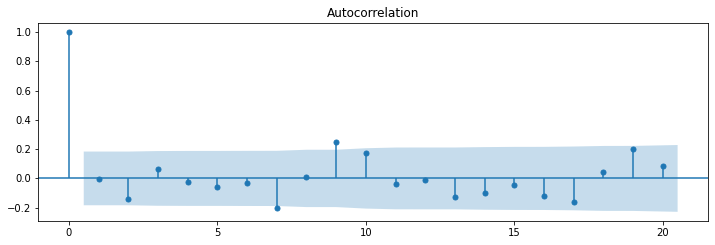

In [58]:
# ACF plot to test for autocorrelation in the residuals
%matplotlib inline
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR2.resid, lags=20, ax=ax1)

In [59]:
# Custom function to test for a normal distribution
def resid_histogram(data):
    import matplotlib.pyplot as plt
    from numpy import linspace
    from scipy.stats import norm

    plt.figure(figsize=(10, 6))
    plt.hist(data, bins="auto", density=True, rwidth=0.85, label="Residuals")
    mean_resid, std_resid = norm.fit(data)
    xmin, xmax = plt.xlim()
    curve_length = linspace(xmin, xmax, 100)
    bell_curve = norm.pdf(curve_length, mean_resid, std_resid)
    plt.plot(curve_length, bell_curve, "m", linewidth=2)
    plt.grid(axis="y", alpha=0.2)
    plt.xlabel("Residuals")
    plt.ylabel("Density")
    plt.title(
        "Residuals vs Normal Distribution - Mean = "
        + str(round(mean_resid, 2))
        + ", Std = "
        + str(round(std_resid, 2))
    )
    plt.show()

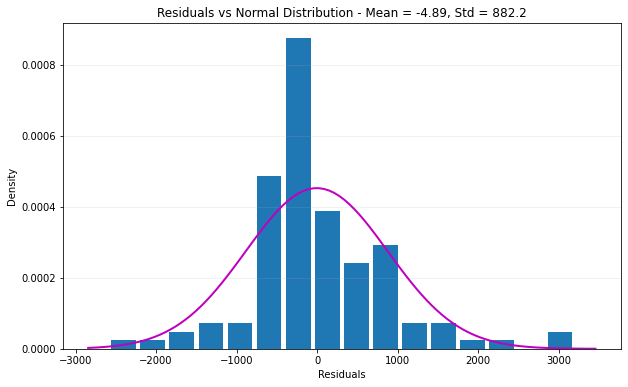

In [60]:
resid_histogram(results_AR2.resid)

In [61]:
# Model diagnostics and improvement
results_AR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(2, 0)   Log Likelihood                -935.016
Method:                       css-mle   S.D. of innovations            876.447
Date:                Mon, 08 Nov 2021   AIC                           1878.032
Time:                        23:19:54   BIC                           1888.977
Sample:                    12-31-1821   HQIC                          1882.474
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1544.9001    181.671      8.504      0.000    1188.832    1900.968
ar.L1.y        1.1474      0.074     15.459      0.000       1.002       1.293
ar.L2.y       -0.5998      0.074     -8.110      0.000      -0.745      -0.455
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9566           -0.8673j            1.2913           -0.1172
AR.2            0.9566           +0.8673j            1.2913            0.1172
-----------------------------------------------------------------------------
"""

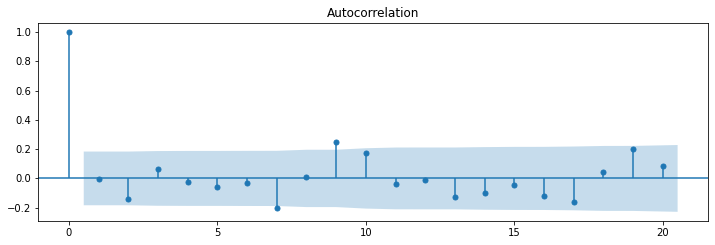

In [62]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR2.resid, lags=20, ax=ax1)

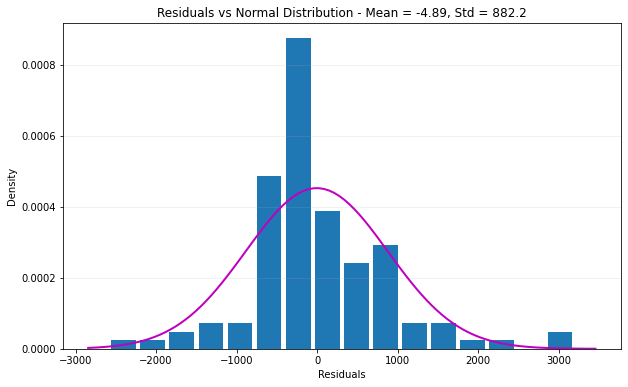

In [63]:
resid_histogram(results_AR2.resid)

C:\Users\hetia\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


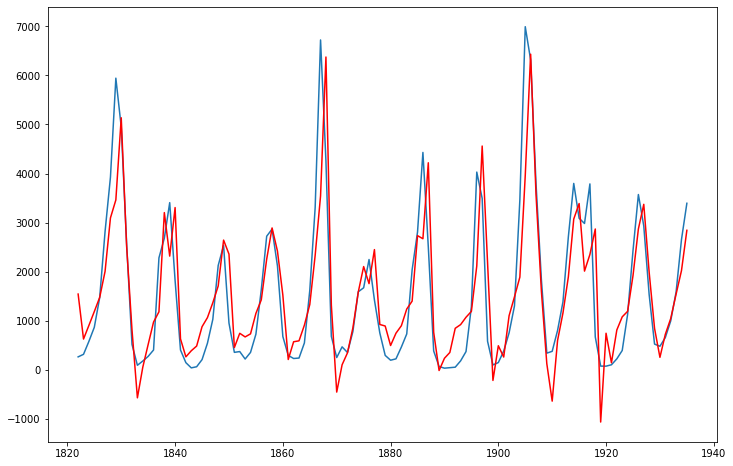

In [64]:
# Adjusting the model
model = ARIMA(mylynxts, order=(4, 0, 0))
results_AR4 = model.fit()
plt.figure(figsize=(12, 8))
plt.plot(mylynxts)
plt.plot(results_AR4.fittedvalues, color="red")

In [65]:
results_AR4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(4, 0)   Log Likelihood                -931.111
Method:                       css-mle   S.D. of innovations            845.949
Date:                Mon, 08 Nov 2021   AIC                           1874.222
Time:                        23:19:55   BIC                           1890.639
Sample:                    12-31-1821   HQIC                          1880.885
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1547.4765    136.851     11.308      0.000    1279.254    1815.699
ar.L1.y        1.1246      0.090     12.450      0.000       0.948       1.302
ar.L2.y       -0.7174      0.137     -5.250      0.000      -0.985      -0.450
ar.L3.y        0.2634      0.136      1.935      0.053      -0.003       0.530
ar.L4.y       -0.2543      0.090     -2.837      0.005      -0.430      -0.079
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9198           -0.6880j            1.1486           -0.1022
AR.2            0.9198           +0.6880j            1.1486            0.1022
AR.3           -0.4020           -1.6789j            1.7264           -0.2874
AR.4           -0.4020           +1.6789j            1.7264            0.2874
-----------------------------------------------------------------------------
"""

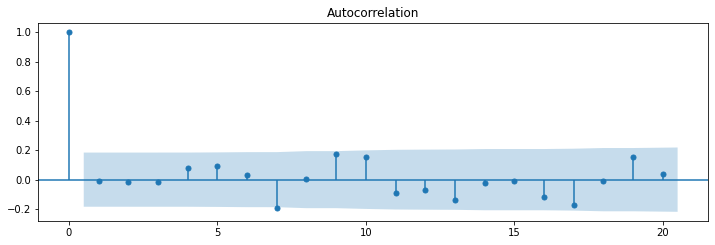

In [66]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR4.resid, lags=20, ax=ax1)

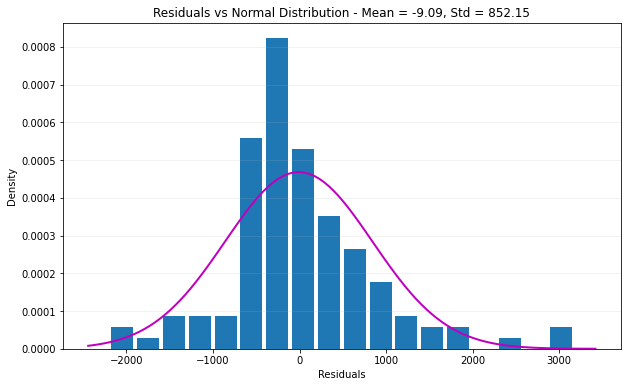

In [67]:
resid_histogram(results_AR4.resid)

In [68]:
# ARIMA forecast
Fcast400 = results_AR4.predict(start="31/12/1935", end="31/12/1945")

In [69]:
# Arima(2,0,2) model and forecast
model202 = ARIMA(mylynxts, order=(2, 0, 2))
results_M202 = model202.fit()
Fcast202 = results_M202.predict(start="31/12/1935", end="31/12/1945")

C:\Users\hetia\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


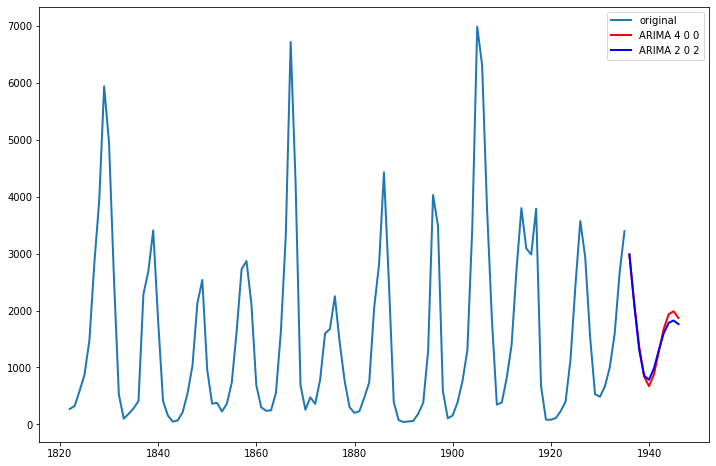

In [70]:
# Forecast comparison
plt.figure(figsize=(12, 8))
plt.plot(mylynxts, linewidth=2, label="original")
plt.plot(Fcast400, color="red", linewidth=2, label="ARIMA 4 0 0")
plt.plot(Fcast202, color="blue", linewidth=2, label="ARIMA 2 0 2")
plt.legend()

# Module: Handling Seasonal Datasets and Working with Seasonality

In [71]:
# Required packages
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
# Read in the 'nottem' dataset
# Make sure that nottem.csv is in the same folder as this python notebook
nottem = pd.read_csv("nottem.csv", header=0, names=["index", "temp"], index_col=0)
nottem.head()

,temp
index,
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1


In [73]:
# Pandas DataFrame object with time stamp (monthly frequency)
nottem_df = pd.DataFrame(
    (nottem.temp).values,
    columns=["temperature"],
    index=pd.date_range("1920-01-31", periods=240, freq="M"),
)

In [74]:
# Pandas Series object with time stamp (monthly frequency)
nottemts = pd.Series(
    (nottem.temp).values, index=pd.date_range("1920-01-31", periods=240, freq="M")
)

In [75]:
nottem_df.head()

,temperature
1920-01-31,40.6
1920-02-29,40.8
1920-03-31,44.4
1920-04-30,46.7
1920-05-31,54.1


In [76]:
nottemts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

In [77]:
# Month plot
from statsmodels.graphics.tsaplots import month_plot

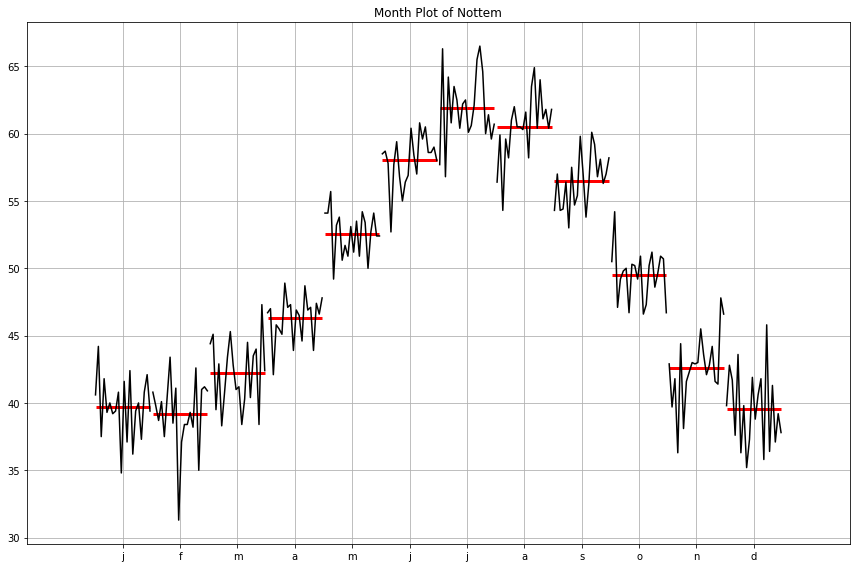

In [78]:
# Month_plot() requires the data to have a monthly (12 or 'M') frequency
# Alternative: quarter_plot() for dataset with a frequency of 4 or 'Q'
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
month_plot(nottemts, ax=ax1)
plt.title("Month Plot of Nottem")
plt.grid(axis="both")
plt.tight_layout()

In [79]:
# Season plot
# Restructuring of nottem_df by pandas pivot_table
pivot_df = pd.pivot_table(
    nottem_df,
    index=nottem_df.index.month,
    columns=nottem_df.index.year,
    values="temperature",
)
pivot_df

,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939
1,40.6,44.2,37.5,41.8,39.3,40.0,39.2,39.4,40.8,34.8,41.6,37.1,42.4,36.2,39.4,40.0,37.3,40.8,42.1,39.4
2,40.8,39.8,38.7,40.1,37.5,40.5,43.4,38.5,41.1,31.3,37.1,38.4,38.4,39.3,38.2,42.6,35.0,41.0,41.2,40.9
3,44.4,45.1,39.5,42.9,38.3,40.8,43.4,45.3,42.8,41.0,41.2,38.4,40.3,44.5,40.4,43.5,44.0,38.4,47.3,42.4
4,46.7,47.0,42.1,45.8,45.5,45.1,48.9,47.1,47.3,43.9,46.9,46.5,44.6,48.7,46.9,47.1,43.9,47.4,46.6,47.8
5,54.1,54.1,55.7,49.2,53.2,53.8,50.6,51.7,50.9,53.1,51.2,53.5,50.9,54.2,53.4,50.0,52.7,54.1,52.4,52.4
6,58.5,58.7,57.8,52.7,57.7,59.4,56.8,55.0,56.4,56.9,60.4,58.4,57.0,60.8,59.6,60.5,58.6,58.6,59.0,58.0
7,57.7,66.3,56.8,64.2,60.8,63.5,62.5,60.4,62.2,62.5,60.1,60.6,62.1,65.5,66.5,64.6,60.0,61.4,59.6,60.7
8,56.4,59.9,54.3,59.6,58.2,61.0,62.0,60.5,60.5,60.3,61.6,58.2,63.5,64.9,60.4,64.0,61.1,61.8,60.4,61.8
9,54.3,57.0,54.3,54.4,56.4,53.0,57.5,54.7,55.4,59.8,57.0,53.8,56.3,60.1,59.2,56.8,58.1,56.3,57.0,58.2
10,50.5,54.2,47.1,49.2,49.8,50.0,46.7,50.3,50.2,49.2,50.9,46.6,47.3,50.2,51.2,48.6,49.6,50.9,50.7,46.7


In [80]:
# Add a new index to the pivot table
month_names = (
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
)
pivot_df.index = month_names
pivot_df

,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939
Jan,40.6,44.2,37.5,41.8,39.3,40.0,39.2,39.4,40.8,34.8,41.6,37.1,42.4,36.2,39.4,40.0,37.3,40.8,42.1,39.4
Feb,40.8,39.8,38.7,40.1,37.5,40.5,43.4,38.5,41.1,31.3,37.1,38.4,38.4,39.3,38.2,42.6,35.0,41.0,41.2,40.9
Mar,44.4,45.1,39.5,42.9,38.3,40.8,43.4,45.3,42.8,41.0,41.2,38.4,40.3,44.5,40.4,43.5,44.0,38.4,47.3,42.4
Apr,46.7,47.0,42.1,45.8,45.5,45.1,48.9,47.1,47.3,43.9,46.9,46.5,44.6,48.7,46.9,47.1,43.9,47.4,46.6,47.8
May,54.1,54.1,55.7,49.2,53.2,53.8,50.6,51.7,50.9,53.1,51.2,53.5,50.9,54.2,53.4,50.0,52.7,54.1,52.4,52.4
Jun,58.5,58.7,57.8,52.7,57.7,59.4,56.8,55.0,56.4,56.9,60.4,58.4,57.0,60.8,59.6,60.5,58.6,58.6,59.0,58.0
Jul,57.7,66.3,56.8,64.2,60.8,63.5,62.5,60.4,62.2,62.5,60.1,60.6,62.1,65.5,66.5,64.6,60.0,61.4,59.6,60.7
Aug,56.4,59.9,54.3,59.6,58.2,61.0,62.0,60.5,60.5,60.3,61.6,58.2,63.5,64.9,60.4,64.0,61.1,61.8,60.4,61.8
Sep,54.3,57.0,54.3,54.4,56.4,53.0,57.5,54.7,55.4,59.8,57.0,53.8,56.3,60.1,59.2,56.8,58.1,56.3,57.0,58.2
Oct,50.5,54.2,47.1,49.2,49.8,50.0,46.7,50.3,50.2,49.2,50.9,46.6,47.3,50.2,51.2,48.6,49.6,50.9,50.7,46.7


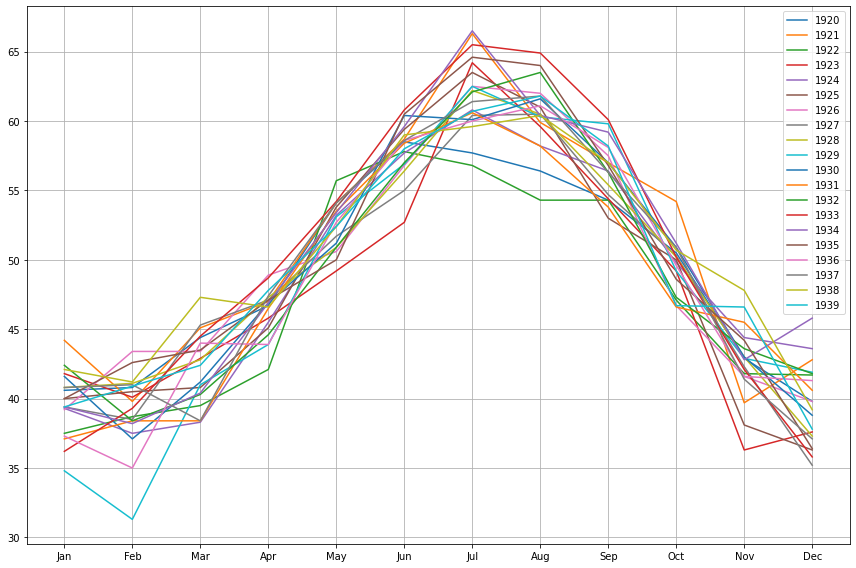

In [81]:
# Creating the season plot
plt.figure(figsize=(12, 8))
plt.plot(pivot_df)
plt.grid(axis="both")
plt.legend(pivot_df.columns)
plt.tight_layout()

In [83]:
# Seasonal ARIMA model with pmdarima
# Install pmdarima via PIP
import pmdarima as pm

In [84]:
help(pm.auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [85]:
mySA = pm.auto_arima(
    nottemts,
    error_action="ignore",
    suppress_warnings=True,
    seasonal=True,
    m=12,
    start_q=1,
    start_p=1,
    start_Q=0,
    start_P=0,
    max_order=5,
    max_d=1,
    max_D=1,
    D=1,
    stepwise=False,
    trace=True,
)

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1213.182, Time=0.08 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1061.945, Time=0.57 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1096.427, Time=0.23 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1060.230, Time=0.21 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=1060.668, Time=0.89 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1080.055, Time=0.54 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1059.767, Time=0.87 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=1061.767, Time=1.31 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1208.231, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1052.072, Time=0.87 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1081.981, Time=0.14 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1049.251, Time=0.28 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1049.239, Time=1.20 sec
 ARIM

In [86]:
mySA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  240
Model:             SARIMAX(1, 0, 0)x(2, 1, [1], 12)   Log Likelihood                -516.879
Date:                              Mon, 08 Nov 2021   AIC                           1045.757
Time:                                      23:22:09   BIC                           1066.333
Sample:                                           0   HQIC                          1054.059
                                              - 240                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0353      0.036      0.976      0.329      -0.036       0.106
ar.L1          0.2650      0.061      4.317      0.000       0.145       0.385
ar.S.L12      -0.1818      0.108     -1.677      0.094      -0.394       0.031
ar.S.L24       0.1466      0.104      1.408      0.159      -0.058       0.351
ma.S.L12      -0.8324      0.098     -8.505      0.000      -1.024      -0.641
sigma2         5.0728      0.513      9.886      0.000       4.067       6.079
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.80   Prob(JB):                         0.83
Heteroskedasticity (H):               0.88   Skew:                            -0.08
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

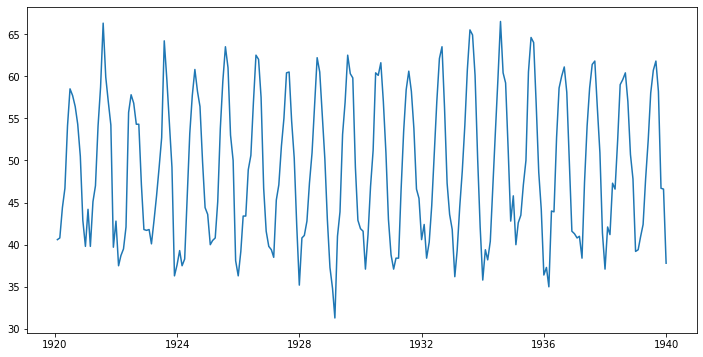

In [87]:
# Additive or multiplicative decomposition
plt.figure(figsize=(12, 6))
plt.plot(nottemts)

In [88]:
# Seasonal Decomposition
# Simple seasonal decomposition with statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [89]:
# By default model = "additive"
# For a multiplicative model use model = "multiplicative"
nottem_decomposed = seasonal_decompose(nottemts)

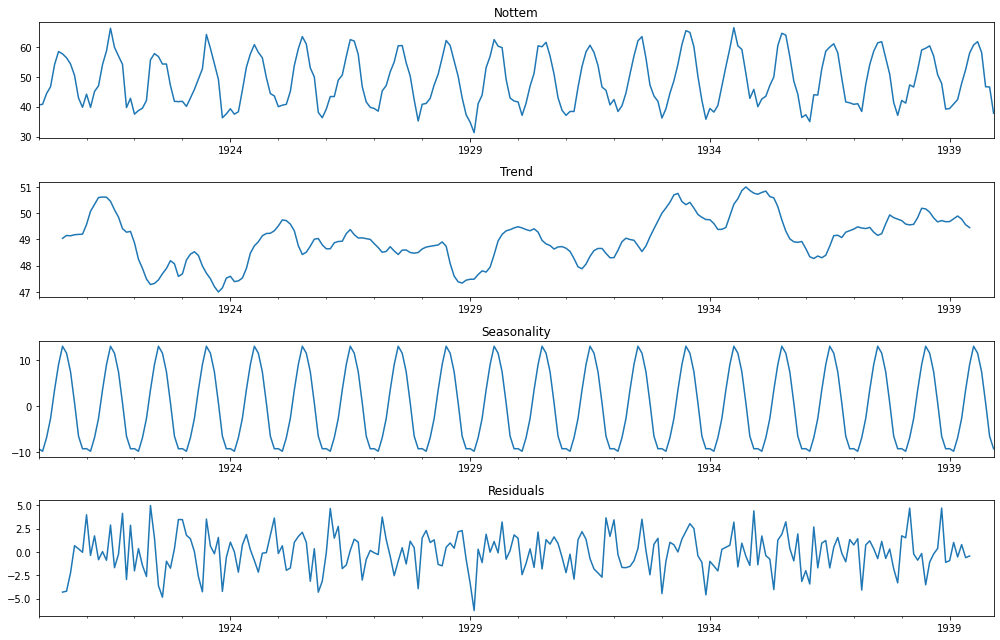

In [90]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 9))
nottemts.plot(ax=ax1)
nottem_decomposed.trend.plot(ax=ax2)
nottem_decomposed.seasonal.plot(ax=ax3)
nottem_decomposed.resid.plot(ax=ax4)
ax1.set_title("Nottem")
ax2.set_title("Trend")
ax3.set_title("Seasonality")
ax4.set_title("Residuals")
plt.tight_layout()

In [2]:
# Decomposition based on stl - Package: stldecompose
# Install the library via PIP
from stldecompose import decompose

ModuleNotFoundError: No module named 'stldecompose'

In [ ]:
nottem_stl = decompose(nottemts, period=12)

In [ ]:
# No NaN
nottem_stl.trend.head()

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 9))
nottemts.plot(ax=ax1)
nottem_stl.trend.plot(ax=ax2)
nottem_stl.seasonal.plot(ax=ax3)
nottem_stl.resid.plot(ax=ax4)
ax1.set_title("Nottem")
ax2.set_title("Trend")
ax3.set_title("Seasonality")
ax4.set_title("Residuals")
plt.tight_layout()

In [ ]:
# Eliminating the seasonal component
nottem_adjusted = nottemts - nottem_stl.seasonal
plt.figure(figsize=(12, 8))
nottem_adjusted.plot()

In [ ]:
# Getting the seasonal component only
# Seasonality gives structure to the data
plt.figure(figsize=(12, 8))
nottem_stl.seasonal.plot()

In [ ]:
# Creating a forecast based on STL
from stldecompose import forecast
from stldecompose.forecast_funcs import naive, drift, mean, seasonal_naive

In [ ]:
stl_fcast = forecast(nottem_stl, steps=12, fc_func=seasonal_naive, seasonal=True)

stl_fcast.head()

In [ ]:
# Plot of the forecast and the original data
plt.figure(figsize=(12, 8))
plt.plot(nottemts, label="Nottem")
plt.plot(stl_fcast, label=stl_fcast.columns[0])
plt.legend()

# Module: Creating a Time Series Forecast using Exponential Smoothing Models

In [ ]:
# Required modules
import matplotlib.pylab as plt
import pandas as pd

In [ ]:
# Importing the nottem dataset as a pandas DataFrame
# Make sure that nottem.csv is in the same folder as this python notebook
nottem = pd.read_csv("nottem.csv", header=0, names=["Month", "Temp"], index_col=0)
nottem.head()

In [ ]:
# Conversion to a pandas Series object
nottemts = pd.Series(
    (nottem.Temp).values, index=pd.date_range("1920-01-31", periods=240, freq="M")
)

In [ ]:
# Exponential smoothing function
from statsmodels.tsa.holtwinters import ExponentialSmoothing

help(ExponentialSmoothing)

In [ ]:
# Setting up the model Holt-Winters(A,N,A)
expsmodel = ExponentialSmoothing(nottemts, seasonal="additive", seasonal_periods=12)

In [ ]:
# Fitting the model
# Default: optimized = True
# Optional: Insert smoothing coefficients
expsmodelfit = expsmodel.fit()

In [ ]:
# Getting the alpha smoothing coefficient
expsmodelfit.params["smoothing_level"]

In [ ]:
# Getting the gamma smoothing coefficient
expsmodelfit.params["smoothing_seasonal"]

In [ ]:
# Prediction with the predict method
# Alternative: expsmodelfit.forecast(steps = 12)
expsfcast = expsmodelfit.predict(start=240, end=251)

In [ ]:
# Plotting the predicted values and the original data
plt.figure(figsize=(12, 8))
plt.plot(nottemts, label="data")
plt.plot(expsfcast, label="HW forecast")
plt.xlim("1920", "1941")
plt.ylim(30, 70)
plt.legend()

In [ ]:
# Comparing the model and the original values
# How good is the model fit?
plt.figure(figsize=(12, 8))
plt.plot(nottemts, label="data")
plt.plot(expsmodelfit.fittedvalues, label="HW model")
plt.xlim("1920", "1940")
plt.ylim(30, 70)
plt.legend()

# Module: Course Summary and Further Resources

In [ ]:
# Decomposition model with Prophet by Facebook
# Install fbprophet with PIP or Conda Forge
# Dependency: PyStan
# Importing the Prophet function
from fbprophet import Prophet

In [ ]:
# Data preparation
# Naming convention: 'ds' = time stamp, 'y' = observations
# Index != time stamp
# Required class: DataFrame (pandas)

In [ ]:
# Importing the nottem dataset as a pandas DataFrame
# Make sure that nottem.csv is in the same folder as this python notebook
import pandas as pd

nottem = pd.read_csv("nottem.csv", header=0, names=["Month", "Temp"], index_col=0)
# Generating the time stamp
nottemts = pd.Series(
    (nottem.Temp).values, index=pd.date_range("1920-01-31", periods=240, freq="M")
)
nottemts.head()

In [ ]:
# Create a pandas.DataFrame with the values of nottemts
nottem_df = pd.DataFrame({"ds": nottemts.index, "y": nottemts.values})
nottem_df.head()

In [ ]:
nottem_df.dtypes

In [ ]:
# Make the prophet model and fit on the data
mymodel = Prophet()
mymodel.fit(nottem_df)

In [ ]:
# Create a forecast with 'mymodel'
future_data = mymodel.make_future_dataframe(periods=12, freq="m")
fcast = mymodel.predict(future_data)

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
mymodel.plot(fcast, ax=ax1)
plt.ylabel("Temperature (F)")
plt.xlabel("Year")
plt.legend()